In [42]:
import pandas as pd
import seaborn as sns

In [43]:
DataDict = pd.read_excel("Data_Dictionary.xlsx")

In [44]:
LoanDf = pd.read_csv("loan.csv", low_memory=False)

In [45]:
LoanDf.shape

(39717, 111)

In [46]:
LoanDf.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Displaying the first few entries

In [47]:
LoanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Droping columns with null values:

### List of columns with all null values

In [48]:
df = LoanDf.isna().sum()==LoanDf.shape[0]
df[((LoanDf.isna().sum()==LoanDf.shape[0])==True)]

mths_since_last_major_derog       True
annual_inc_joint                  True
dti_joint                         True
verification_status_joint         True
tot_coll_amt                      True
tot_cur_bal                       True
open_acc_6m                       True
open_il_6m                        True
open_il_12m                       True
open_il_24m                       True
mths_since_rcnt_il                True
total_bal_il                      True
il_util                           True
open_rv_12m                       True
open_rv_24m                       True
max_bal_bc                        True
all_util                          True
total_rev_hi_lim                  True
inq_fi                            True
total_cu_tl                       True
inq_last_12m                      True
acc_open_past_24mths              True
avg_cur_bal                       True
bc_open_to_buy                    True
bc_util                           True
mo_sin_old_il_acct       

## Dropping all those columns since we don't have any values in it

In [49]:
LoanDf.drop(df[((LoanDf.isna().sum()==LoanDf.shape[0])==True)].index,axis=1,inplace=True)

## Find the percentage of null values in each column

In [50]:
(LoanDf.isna().sum()/LoanDf.shape[0]*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


## Greater that 50% null values

In [51]:
GTFiftyDf = (LoanDf.isna().sum()/LoanDf.shape[0]*100)[((LoanDf.isna().sum()/LoanDf.shape[0]*100)>50)]
GTFiftyDf

mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64

In [52]:
DataDict[DataDict["LoanStatNew"].isin(GTFiftyDf.index)]

,LoanStatNew,Description
50,mths_since_last_delinq,The number of months since the borrower's last...
52,mths_since_last_record,The number of months since the last public rec...
58,next_pymnt_d,Next scheduled payment date


### Next payment due is something that we could remove from the data set since the we have very few data and also this will not be a key factor is identifing defaulters

In [53]:
LoanDf.drop(["next_pymnt_d"],axis=1,inplace=True)

In [77]:
LoanDf.shape

(39717, 58)

## Next step is to clean the value in each column

In [55]:
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Column 'term'

In [56]:
LoanDf["term"] = LoanDf.term.apply(lambda x: x.rstrip("months")).astype("int")

In [57]:
LoanDf["term"]

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

### Column 'int_rate'

In [58]:
LoanDf["int_rate"] = LoanDf.int_rate.apply(lambda x: x.rstrip("%")).astype("float")

In [59]:
LoanDf["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

### Column 'issue_d' spliting to month and year

In [60]:
LoanDf["issue_d"] = pd.to_datetime(LoanDf["issue_d"],format="%b-%y")

In [61]:
LoanDf["issue_m"] = LoanDf['issue_d'].dt.month_name().str[:3]

In [62]:
LoanDf["issue_y"] = pd.DatetimeIndex(LoanDf["issue_d"]).year

In [63]:
LoanDf[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,Dec,2011
1,2011-12-01,Dec,2011
2,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
4,2011-12-01,Dec,2011


### Column 'pymnt_plan' has only value 'n' hence this could be dropped

In [64]:
LoanDf["pymnt_plan"].unique()

array(['n'], dtype=object)

In [75]:
LoanDf.drop(["pymnt_plan"],axis=1,inplace=True)

### Column 'url' could be dropped as this doesn't have any relevant information for the analysis

In [65]:
LoanDf["url"]

0        https://lendingclub.com/browse/loanDetail.acti...
1        https://lendingclub.com/browse/loanDetail.acti...
2        https://lendingclub.com/browse/loanDetail.acti...
3        https://lendingclub.com/browse/loanDetail.acti...
4        https://lendingclub.com/browse/loanDetail.acti...
                               ...                        
39712    https://lendingclub.com/browse/loanDetail.acti...
39713    https://lendingclub.com/browse/loanDetail.acti...
39714    https://lendingclub.com/browse/loanDetail.acti...
39715    https://lendingclub.com/browse/loanDetail.acti...
39716    https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 39717, dtype: object

In [76]:
LoanDf.drop(["url"],axis=1,inplace=True)

### Column 'earliest_cr_line' spliting into month and year

In [66]:
LoanDf["earliest_cr_line"] = pd.to_datetime(LoanDf["earliest_cr_line"],format="%b-%y")
LoanDf["earliest_cr_line_m"] = LoanDf['earliest_cr_line'].dt.month_name().str[:3]
LoanDf["earliest_cr_line_y"] = pd.DatetimeIndex(LoanDf["earliest_cr_line"]).year

In [67]:
LoanDf[["earliest_cr_line","earliest_cr_line_m","earliest_cr_line_y"]].head()

,earliest_cr_line,earliest_cr_line_m,earliest_cr_line_y
0,1985-01-01,Jan,1985
1,1999-04-01,Apr,1999
2,2001-11-01,Nov,2001
3,1996-02-01,Feb,1996
4,1996-01-01,Jan,1996


### Column 'mths_since_last_delinq' setting the null values as 0, assuming that LC would have the data collected if customer is delinquent
> In special sceanrios (contrary to the assumption) we will handle it seperately

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mths_since_last_delinq'>

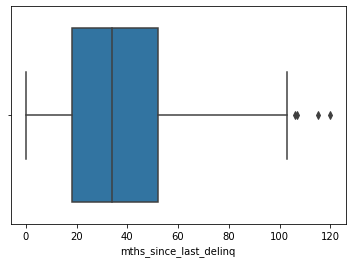

In [68]:
sns.boxplot(LoanDf["mths_since_last_delinq"])

<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Count'>

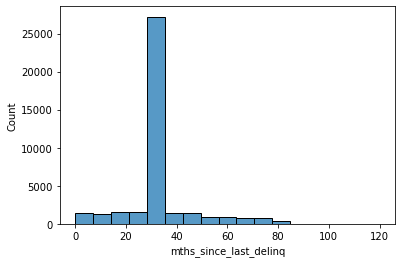

In [73]:
sns.histplot(LoanDf["mths_since_last_delinq"])

In [71]:
LoanDf["mths_since_last_delinq"].median()

34.0

In [72]:
##LoanDf.mths_since_last_delinq.fillna(34,inplace=True)

### Setting the missing value to zero or median will change the distribution a lot hence will leave as it is

### Column 'mths_since_last_record'

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mths_since_last_record'>

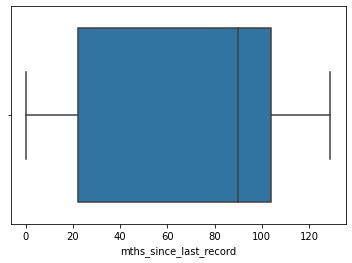

In [33]:
sns.boxplot(LoanDf["mths_since_last_record"])

<AxesSubplot:xlabel='mths_since_last_record', ylabel='Count'>

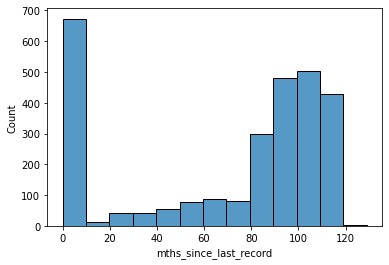

In [38]:
sns.histplot(LoanDf["mths_since_last_record"])

### Setting the missing value to zero or median will change the distribution a lot hence will leave as it is


In [39]:
## LoanDf.mths_since_last_record.fillna(0,inplace=True)

### Column 'revol_util' removing the %

In [91]:
LoanDf['revol_util'] = LoanDf['revol_util'].astype(str).str.rstrip('%')

In [92]:
LoanDf['revol_util']

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: object

### Column 'initial_list_status'

In [96]:
LoanDf["initial_list_status"]
## What is w & f ?

0        f
1        f
2        f
3        f
4        f
        ..
39712    f
39713    f
39714    f
39715    f
39716    f
Name: initial_list_status, Length: 39717, dtype: object

### Column 'total_pymnt' rounding off to 2 decimals

In [102]:
LoanDf["total_pymnt"] = LoanDf["total_pymnt"].round(2)

### Column 'total_pymnt_inv' rounding off to 2 decimals

In [104]:
LoanDf["total_pymnt_inv"] = LoanDf["total_pymnt_inv"].round(2)

### Column 'last_pymnt_d' spliting into month and year

In [110]:
LoanDf["last_pymnt_d"]

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [111]:
LoanDf["last_pymnt_d"] = pd.to_datetime(LoanDf["last_pymnt_d"],format="%b-%y")
LoanDf["last_pymnt_m"] = LoanDf['last_pymnt_d'].dt.month_name().str[:3]
LoanDf["last_pymnt_y"] = pd.DatetimeIndex(LoanDf["last_pymnt_d"]).year

In [112]:
LoanDf[["last_pymnt_d","last_pymnt_m","last_pymnt_y"]].head()

,last_pymnt_d,last_pymnt_m,last_pymnt_y
0,2015-01-01,Jan,2015.0
1,2013-04-01,Apr,2013.0
2,2014-06-01,Jun,2014.0
3,2015-01-01,Jan,2015.0
4,2016-05-01,May,2016.0


### <span style="color:red">Remove the trailing zero</span>.

In [123]:
LoanDf["last_credit_pull_d"]

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

### Column 'last_credit_pull_d' spliting to month and year

In [124]:
LoanDf["last_credit_pull_d"] = pd.to_datetime(LoanDf["last_credit_pull_d"],format="%b-%y")
LoanDf["last_credit_pull_m"] = LoanDf['last_credit_pull_d'].dt.month_name().str[:3]
LoanDf["last_credit_pull_y"] = pd.DatetimeIndex(LoanDf["last_credit_pull_d"]).year

In [125]:
LoanDf[["last_credit_pull_d","last_credit_pull_m","last_credit_pull_y"]].head()

,last_credit_pull_d,last_credit_pull_m,last_credit_pull_y
0,2016-05-01,May,2016.0
1,2013-09-01,Sep,2013.0
2,2016-05-01,May,2016.0
3,2016-04-01,Apr,2016.0
4,2016-05-01,May,2016.0


### <span style="color:red">Remove the trailing zero</span>.

In [129]:
LoanDf["collections_12_mths_ex_med"].unique()

array([ 0., nan])

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='collections_12_mths_ex_med'>

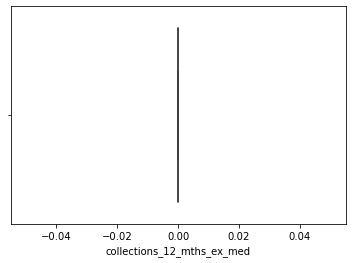

In [127]:
sns.boxplot(LoanDf["collections_12_mths_ex_med"])

### <span style="color:red">What is medical collection ??? </span>.

### We can ignore/drop this column since this doesn't have any meaningfull data

In [130]:
LoanDf.drop(["collections_12_mths_ex_med"],axis=1,inplace=True)

### Column 'application_type' has only value 'INDIVIDUAL' hence we can drop this

In [133]:
LoanDf["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [134]:
LoanDf.drop(["application_type"],axis=1,inplace=True)

### Column 'acc_now_delinq' has only value '0' hence we can drop this


In [139]:
LoanDf["acc_now_delinq"].unique()

array([0])

In [140]:
LoanDf.drop(["acc_now_delinq"],axis=1,inplace=True)

### Column 'chargeoff_within_12_mths' has only value '0 & nan' hence we can drop this


In [142]:
LoanDf["chargeoff_within_12_mths"].unique()

array([ 0., nan])

In [143]:
LoanDf.drop(["chargeoff_within_12_mths"],axis=1,inplace=True)

### Column 'delinq_amnt' has only value '0' hence we can drop this


In [146]:
LoanDf["delinq_amnt"].unique()

array([0])

In [147]:
LoanDf.drop(["delinq_amnt"],axis=1,inplace=True)

In [150]:
LoanDf["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

In [153]:
LoanDf["pub_rec_bankruptcies"].isnull().sum()

697

/Users/I320866/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

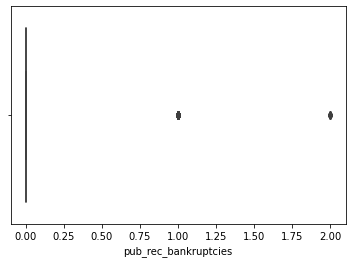

In [151]:
sns.boxplot(LoanDf["pub_rec_bankruptcies"])

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

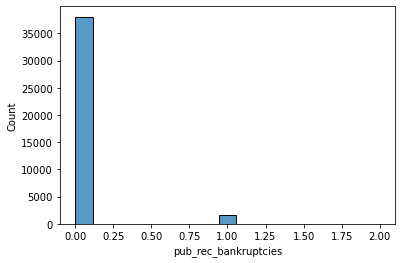

In [155]:
sns.histplot(LoanDf["pub_rec_bankruptcies"])

### Majority of the value is zero hence setting the missing value as zero will not impact the overall distribution

In [154]:
LoanDf.pub_rec_bankruptcies.fillna(0,inplace=True)

### Column 'tax_liens' has only value '0 & nan' hence we can drop this

In [157]:
LoanDf["tax_liens"].unique()

array([ 0., nan])

In [158]:
LoanDf.drop(["tax_liens"],axis=1,inplace=True)

## Final structure of DataFrame after cleaning

In [159]:
LoanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   member_id                39717 non-null  int64         
 2   loan_amnt                39717 non-null  int64         
 3   funded_amnt              39717 non-null  int64         
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int64         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_ownership           39717 n

In [161]:
LoanDf.shape

(39717, 56)